In [16]:
from scipy.signal import tf2zpk
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('default')
from scipy import signal
from scipy.signal import freqz
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [45]:
num_t = 1000
pi = np.pi
t = np.arange(0, num_t) / num_t
x_t = 4 + np.cos(250 * pi * t - pi / 4) - 3 * np.cos((2000 * pi / 3) * t)

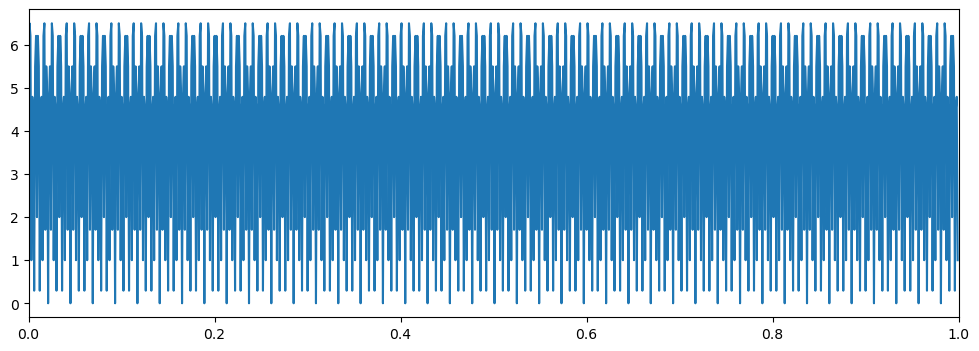

In [46]:
plt.xlim([0, 1])
plt.plot(t, x_t)

(array([4.00000002e+00, 2.00300019e+00, 1.33824996e-03, 5.01645124e-04,
        2.67520938e-04, 1.67198784e-04, 1.14653129e-04, 8.36047552e-05,
        6.37024950e-05, 5.01692221e-05, 4.05441033e-05, 3.34520094e-05,
        2.80745615e-05, 2.38995854e-05, 2.05930585e-05, 1.79295179e-05,
        1.57522705e-05, 1.39496509e-05, 1.24403275e-05, 1.11639185e-05,
        1.00748293e-05, 9.13810832e-06, 8.32659701e-06, 7.61893305e-06,
        6.99812608e-06, 6.45052588e-06, 5.96506398e-06, 5.53268890e-06,
        5.14594052e-06, 4.79862568e-06, 4.48556844e-06, 4.20241595e-06,
        3.94548624e-06, 3.71164786e-06, 3.49822400e-06, 3.30291555e-06,
        3.12373894e-06, 2.95897557e-06, 2.80713058e-06, 2.66689870e-06,
        2.53713622e-06, 2.41683778e-06, 2.30511646e-06, 2.20118790e-06,
        2.10435616e-06, 2.01400223e-06, 1.92957411e-06, 1.85057833e-06,
        1.77657281e-06, 1.70716060e-06, 1.64198460e-06, 1.58072298e-06,
        1.52308515e-06, 1.46880838e-06, 1.41765471e-06, 1.369408

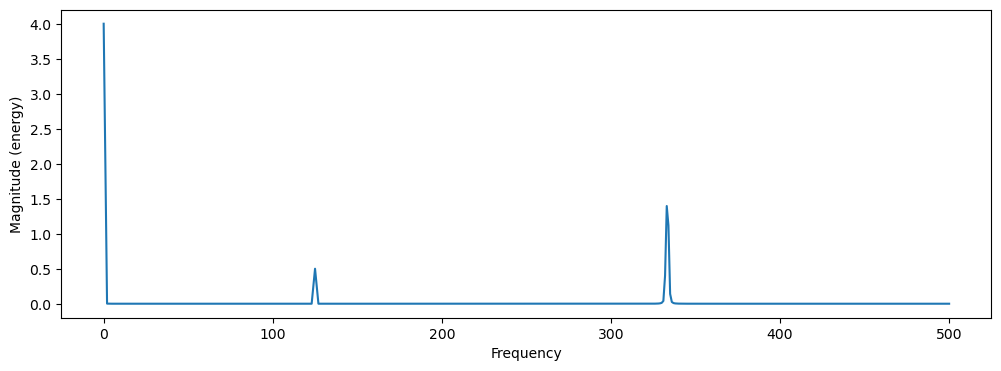

In [49]:
plt.magnitude_spectrum(x_t, Fs=1000)

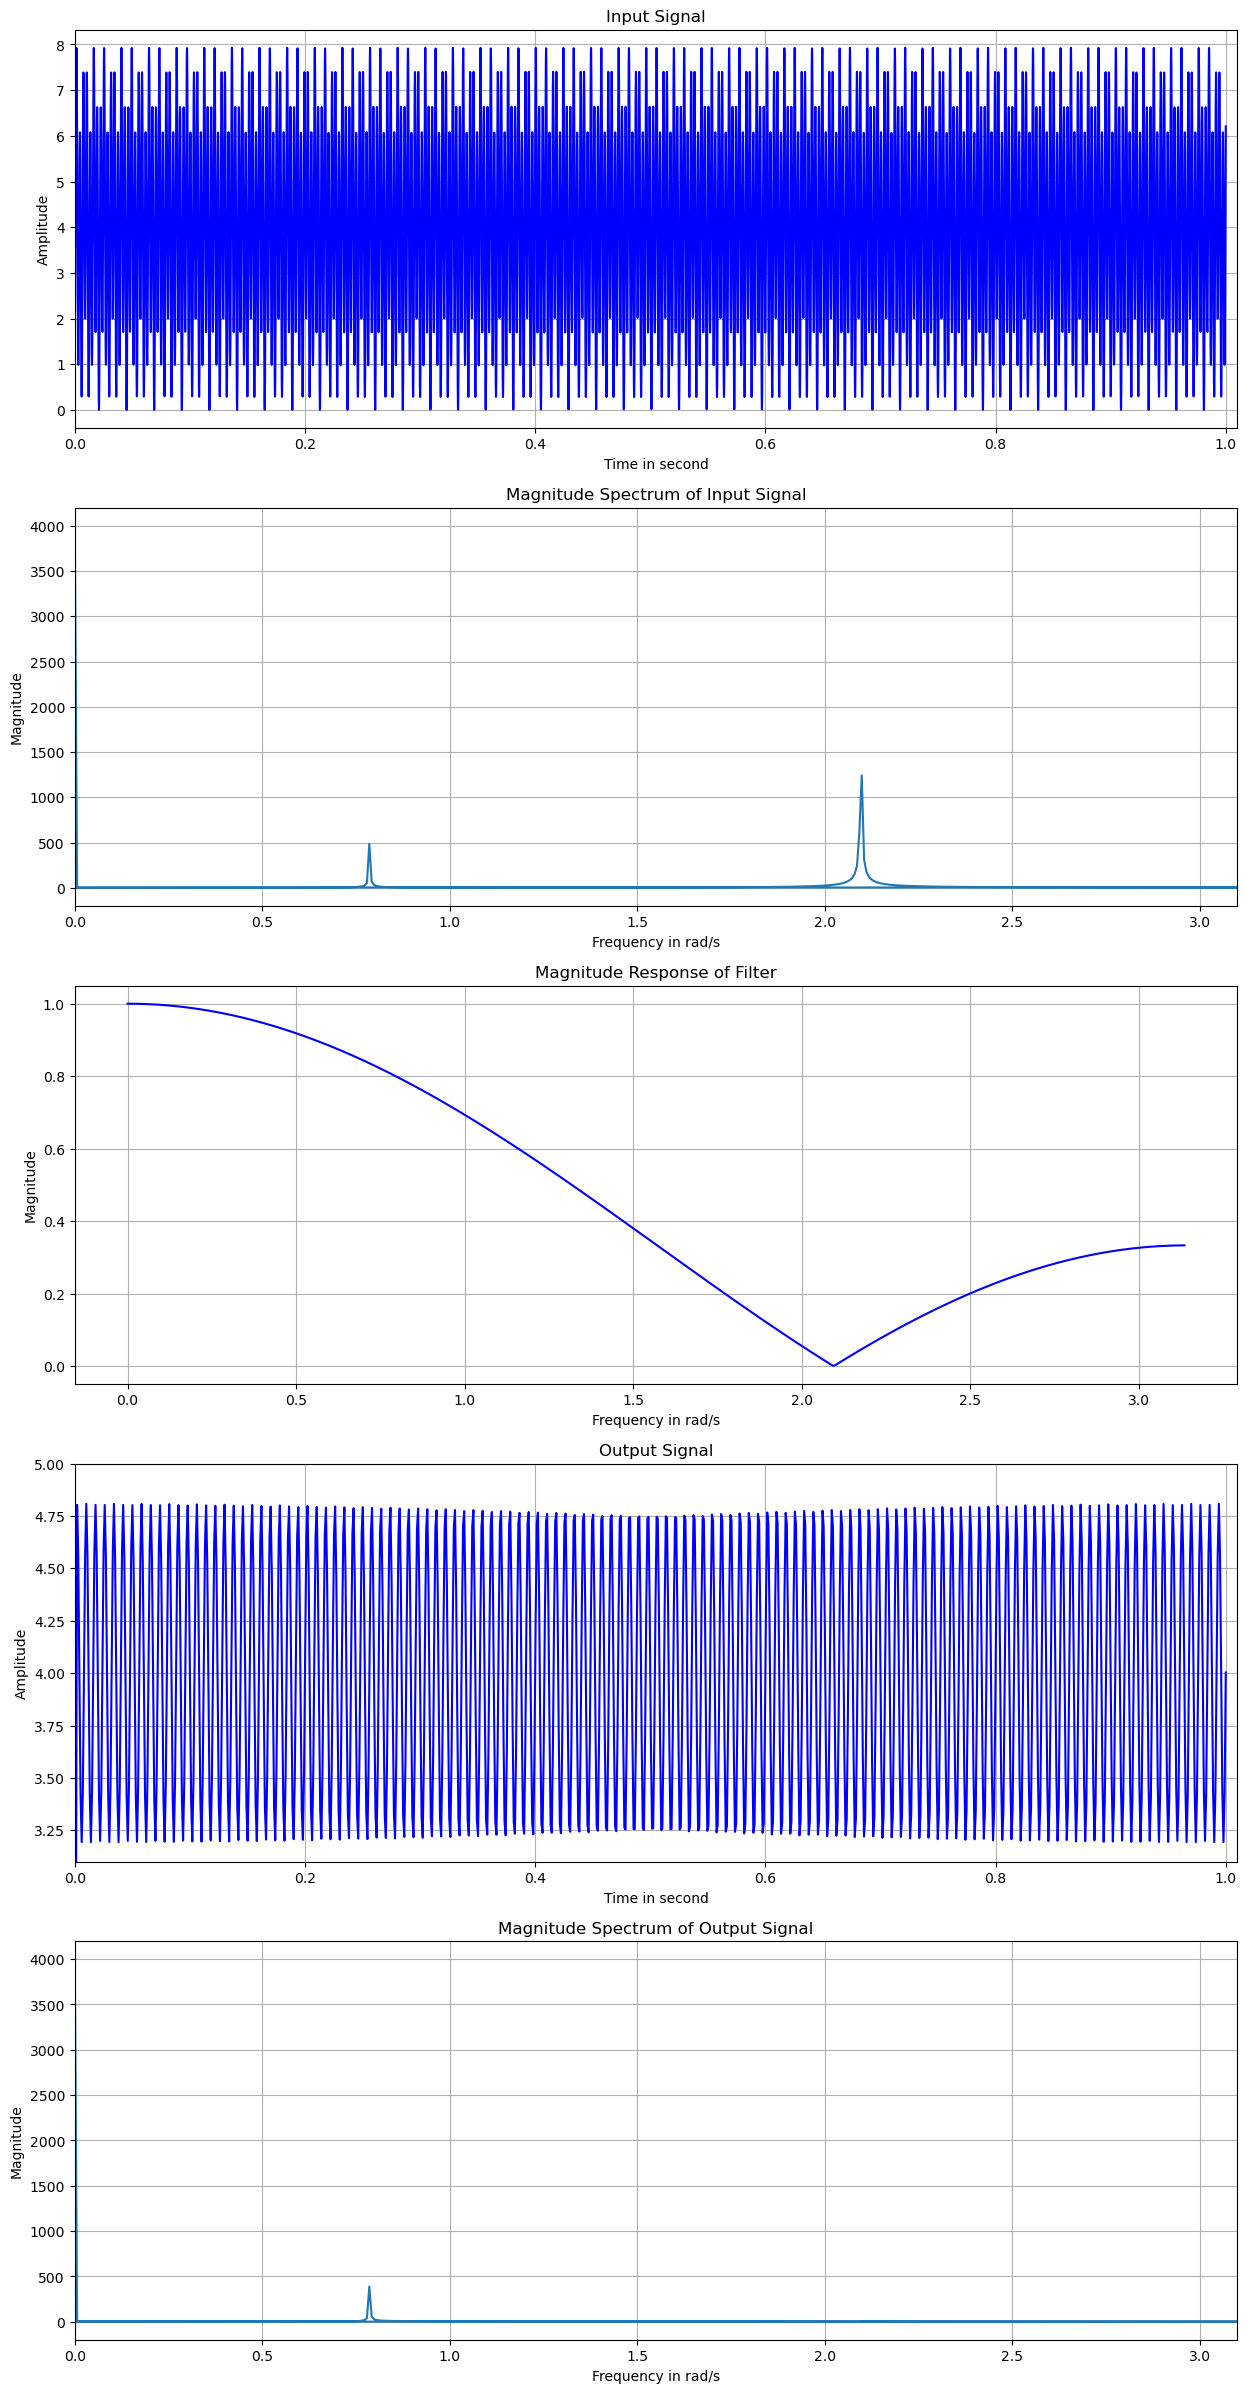

In [67]:
from scipy.signal import tf2zpk
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('default')
from scipy import signal
from scipy.signal import freqz
# plt.rcParams['figure.figsize'] = [12, 20]
# plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
fig, ax = plt.subplots(5, 1, figsize=(15,30))

def computeMod(a):
    return np.sqrt(a.imag**2 + a.real**2)
t = np.linspace(0, 1, 10000)
x = 4 + np.cos(250 * np.pi * t - np.pi/4) - 3 * np.cos(2000 * np.pi * t / 3)
ax[0].set_xlim(0, 1.01)
ax[0].set_ylabel("Amplitude")
ax[0].set_xlabel('Time in second')
ax[0].grid(True)
ax[0].set_title('Input Signal')
ax[0].plot(t, x, color='b')

t = np.linspace(0, 1, 1000)
x = 4 + np.cos(250 * np.pi * t - np.pi/4) - 3 * np.cos(2000 * np.pi * t / 3)
sp = np.fft.fft(x)
freq = np.fft.fftfreq(t.shape[-1])
w = freq * 2 * np.pi
sp_m = computeMod(sp)
ax[1].set_xlim(0, 3.1)
ax[1].set_ylabel("Magnitude")
ax[1].set_xlabel('Frequency in rad/s')
ax[1].grid(True)
ax[1].set_title('Magnitude Spectrum of Input Signal')
ax[1].plot(w, sp_m)

t = np.linspace(0, 1, 1000)
x = 4 + np.cos(250 * np.pi * t - np.pi/4) - 3 * np.cos(2000 * np.pi * t / 3)
b = [1, 1, 1]
a = [3, 0, 0]
w, h = signal.freqz(b, a)
magnitude = computeMod(h)
ax[2].set_ylabel("Magnitude")
ax[2].set_xlabel('Frequency in rad/s')
ax[2].grid(True)
ax[2].set_title('Magnitude Response of Filter')
ax[2].plot(w, magnitude, color='b')

t = np.linspace(0, 1, 1000)
x = 4 + np.cos(250 * np.pi * t - np.pi/4) - 3 * np.cos(2000 * np.pi * t / 3)
y = signal.lfilter(b, a, x)
ax[3].set_xlim(0, 1.01)
ax[3].set_ylim(3.1, 5)
ax[3].set_ylabel("Amplitude")
ax[3].set_xlabel('Time in second')
ax[3].grid(True)
ax[3].set_title('Output Signal')
ax[3].plot(t, y, color='b')

t = np.linspace(0, 1, 1000)
sp = np.fft.fft(y)
freq = np.fft.fftfreq(t.shape[-1])
w = freq * 2 * np.pi
sp_m = computeMod(sp)
ax[4].set_xlim(0, 3.1)
ax[4].set_ylabel("Magnitude")
ax[4].set_xlabel('Frequency in rad/s')
ax[4].grid(True)
ax[4].set_title('Magnitude Spectrum of Output Signal')
ax[4].plot(w, sp_m)

plt.savefig("Ta_Huu_Binh_20190094.pdf")